In [1]:
from mlchartist.array_builder import full_dataset_randomised_arrays

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Reads Nasdaq 100 components

nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

In [3]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [4]:
# Samples n random companies from Nasdaq 100 list

rand_tickers = random.sample(nasdaq100_list, 1)

In [5]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

In [6]:
# Prints sample tickers list

for tick in rand_tickers:
    print(tick)

EA


In [7]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024

# Drops 'ADI' and 'OBV' from input columns
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']


joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

In [8]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,EA,2020-12-23,68.351546,88.746729,83.745275,2.890073e+08,315840847,3.472432,32.770571,28.457289,...,3.927308,0.014769,0.002473,0.033849,0.014918,-0.000636,0.062627,True,True,True
1,EA,2020-12-22,65.422861,76.650189,85.931376,2.880698e+08,314078403,3.450311,32.003116,29.349057,...,3.770204,0.018791,0.009395,0.047120,-0.011205,-0.008744,0.055089,True,True,True
2,EA,2020-12-21,69.991362,85.838907,87.821687,2.891467e+08,316183498,3.482643,31.334310,31.313251,...,3.574345,-0.002198,-0.029856,0.035175,-0.011219,0.025229,0.077729,False,False,True
3,EA,2020-12-18,74.910210,95.305032,89.640423,2.886205e+08,318814673,3.470538,30.461563,33.839577,...,3.293797,-0.013253,-0.009046,0.020966,0.019735,0.050147,0.108167,False,False,True
4,EA,2020-12-17,71.727578,82.321121,90.976205,2.847815e+08,313940452,3.476734,29.199666,35.326741,...,2.954812,0.014015,-0.002431,0.011298,-0.012359,0.038387,0.089344,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,EA,2012-02-15,40.975949,26.069142,23.090055,-5.968692e+07,-60888933,0.706980,29.915198,22.901018,...,-0.376602,-0.031536,-0.059686,-0.058558,0.005103,-0.026899,-0.037415,False,False,False
2230,EA,2012-02-14,39.741914,23.764405,20.281690,-6.039759e+07,-67622277,0.718363,31.053916,20.730977,...,-0.369667,-0.029995,-0.075301,-0.065661,0.009675,-0.044896,-0.049528,False,False,False
2231,EA,2012-02-13,37.462091,19.436620,16.282416,-6.629297e+07,-73925635,0.749852,31.695078,21.390371,...,-0.360688,-0.015458,-0.044598,-0.012023,0.004024,-0.079473,-0.029934,False,False,False
2232,EA,2012-02-10,36.538623,17.644046,17.658560,-6.516956e+07,-80910284,0.774533,32.385560,19.922873,...,-0.352836,0.002874,-0.035006,-0.033282,-0.025160,-0.094566,-0.039689,True,False,False


In [10]:
joined_df.sort_values(by="date",ascending=True).set_index("date").last('2Y')

,ticker,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,EA,45.316882,56.370150,49.009670,1.657574e+08,311186826,3.027141,47.896287,10.200901,23.453385,...,-3.020147,0.106263,0.118822,0.147689,0.018501,0.075609,0.014382,True,True,True
2019-01-03,EA,41.346995,47.877335,49.292445,1.650003e+08,307434696,3.007060,47.287859,9.535522,21.923580,...,-2.875801,0.156275,0.134673,0.158947,-0.020657,0.010529,-0.016134,True,True,True
2019-01-04,EA,55.717044,92.679912,65.642466,1.699500e+08,314698743,3.258841,43.931464,18.897175,18.784760,...,-2.643753,0.074382,0.095946,0.047493,0.072553,0.062831,0.077336,True,True,True
2019-01-07,EA,61.373091,96.401101,78.986116,1.751194e+08,321319006,3.358495,41.892323,23.079587,16.925418,...,-2.312378,0.011306,0.042470,0.056292,0.037541,0.104541,0.131063,True,True,True
2019-01-08,EA,63.631707,95.451958,94.844323,1.770485e+08,327795924,3.272031,40.517049,25.573124,16.131770,...,-1.908049,0.005275,0.001226,-0.098974,0.016336,0.128126,0.162604,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17,EA,71.727578,82.321121,90.976205,2.847815e+08,313940452,3.476734,29.199666,35.326741,13.160846,...,2.954812,0.014015,-0.002431,0.011298,-0.012359,0.038387,0.089344,True,False,True
2020-12-18,EA,74.910210,95.305032,89.640423,2.886205e+08,318814673,3.470538,30.461563,33.839577,12.242601,...,3.293797,-0.013253,-0.009046,0.020966,0.019735,0.050147,0.108167,False,False,True
2020-12-21,EA,69.991362,85.838907,87.821687,2.891467e+08,316183498,3.482643,31.334310,31.313251,12.579720,...,3.574345,-0.002198,-0.029856,0.035175,-0.011219,0.025229,0.077729,False,False,True


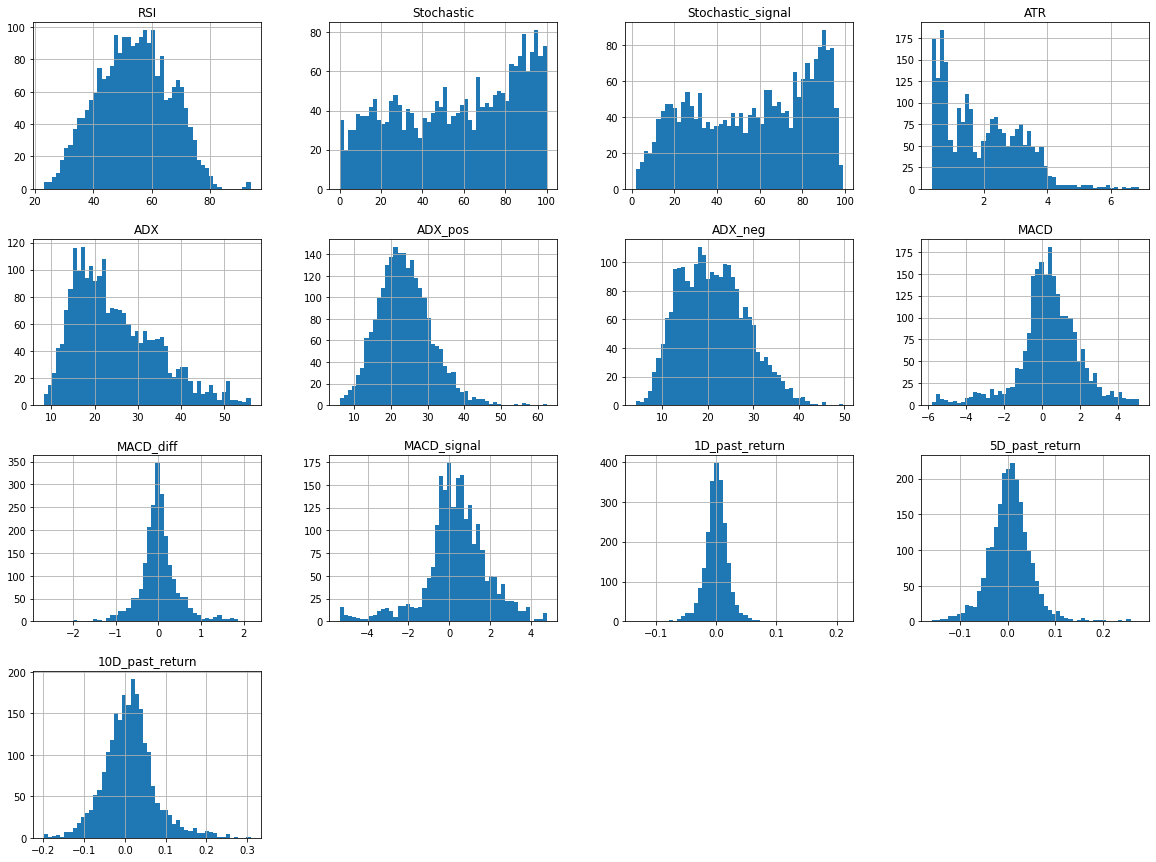

In [11]:
# Plots distribution of the input df without removing outliers

joined_df[INPUT_COLS].hist(figsize=(20, 15), bins=50)
plt.show()

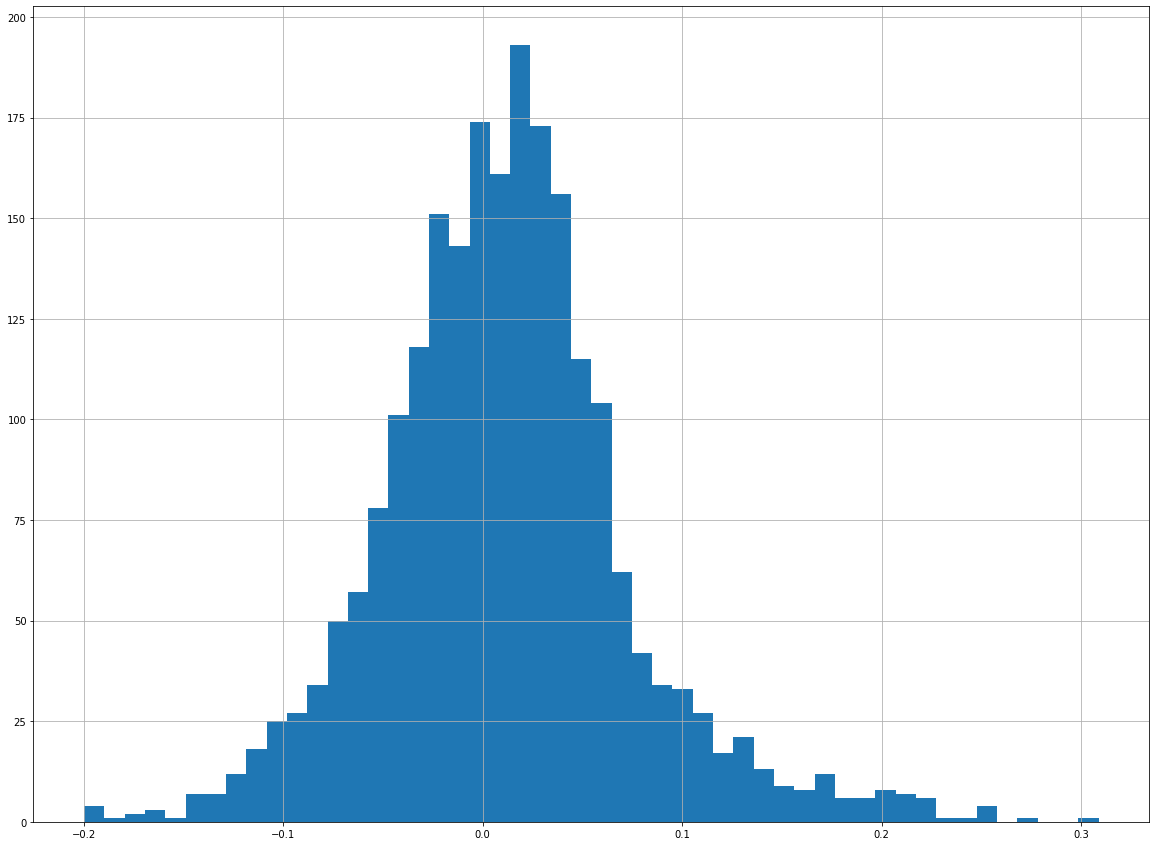

In [12]:
joined_df['10TD_return'].hist(figsize=(20, 15), bins=50)
plt.show()

In [13]:
import joblib

scaler = joblib.load('../../models/scaler')

In [14]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.3, 0.3]}

stride = 1

train_x, train_y, test_x, test_y, scaler_ = full_dataset_randomised_arrays(unsplit_df=joined_df,
                                       train_df=None,
                                       test_df=None,
                                       split_dataframe=True,
                                       test_set_size='2Y', 
                                       time_window=30, 
                                       stride=stride, 
                                       fitted_scaler=scaler,
                                       check_train_outliers=True, 
                                       check_test_outliers=False, 
                                       outlier_threshold=1, 
                                       input_cols=INPUT_COLS, 
                                       target_col=TARGET_COLS, 
                                       outlier_validation=outlier_validation)




# train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
#                                                                                 stride=stride, 
#                                                                                 input_cols=INPUT_COLS, 
#                                                                                 outlier_threshold=1, 
#                                                                                 outlier_validation=outlier_validation, 
#                                                                                 check_train_outliers=True,
#                                                                                 check_test_outliers=False, 
#                                                                                 target_col=TARGET_COLS, 
#                                                                                 time_window=30,
#                                                                                 test_set_size='2Y')

# print('')
# print('')
# print('### Stats ###')
# print('train_x', train_x.shape)
# print('train_y', train_y.shape)
# print('test_x', test_x.shape)
# print('test_y', test_y.shape)
# print('scaler', scaler)

# print('')
# print('')
# print('### Validation ###')


Train/Test Split: Splitting unsplit dataframe
Scaler: Using provided fitted_scaler
1 Companies in Dataset
Starting EA: Company 1 of 1
All Companies Completed



In [16]:
test_y.shape

(471, 1)

In [17]:
pd.DataFrame(test_x[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.858761,0.531588,0.469132,0.997342,0.799097,0.466177,-0.925467,3.186641,1.612450,2.878994,0.757036,-0.114687,0.839812
1,0.686531,0.304462,0.512884,0.987046,0.738511,0.553785,-0.832286,3.185104,2.012824,2.756249,-0.644354,-0.297182,0.722704
2,0.955195,0.476990,0.550716,1.002095,0.685713,0.746749,-0.811889,3.290764,2.887704,2.603223,-0.645134,0.467409,1.074435
3,1.244463,0.654727,0.587115,0.996461,0.616815,0.994937,-0.844721,3.256158,3.491388,2.384031,1.015480,1.028207,1.547330
4,1.057299,0.410940,0.613849,0.999344,0.517196,1.141037,-0.755291,3.041516,3.617181,2.119182,-0.706256,0.763542,1.254897
5,1.397760,0.579436,0.694941,0.974344,0.416908,1.466649,-0.856085,2.928462,4.129240,1.844819,0.315253,1.324273,1.313228
6,1.342299,0.729969,0.703160,0.949569,0.269344,1.230076,-0.745152,2.607168,4.041984,1.531729,1.173677,1.348893,1.505430
7,1.137750,0.639172,0.679730,0.938104,0.145815,1.032859,-0.635530,2.227280,3.728262,1.225239,0.644115,1.052069,1.079720
8,1.005962,0.602568,0.698911,0.957981,0.046807,0.915728,-0.546746,1.942258,3.667453,0.942475,0.402870,1.143025,1.345273
9,0.916161,0.664027,0.732783,0.990486,-0.034824,0.714488,-0.464522,1.678569,3.665952,0.664310,0.565037,1.004031,1.573440


In [18]:
train_x.shape

(1705, 30, 13)

In [19]:
test_y.sum()/len(test_y)

0.5987261146496815

In [20]:
from tensorflow.keras import models

In [21]:
model_n100 = models.load_model('../../models/Nasdaq_100_150k')

In [22]:
model_n100.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 30, 200)           171200    
_________________________________________________________________
lstm_47 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dropout_69 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dense_92 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)             

In [23]:
model_n100.evaluate(test_x, test_y)

15/15 [==============================] - 0s 3ms/step - loss: 0.3223 - precision_24: 0.9486 - accuracy: 0.8832


[0.3223474621772766, 0.948616623878479, 0.8832271695137024]

In [26]:
y_pred = model_n100.predict_classes(test_x)

In [29]:
y_pred.shape

(471, 1)

In [31]:
pd.DataFrame([y_pred[:,0], test_y]).T

,0,1
0,0,[True]
1,0,[True]
2,0,[False]
3,0,[False]
4,0,[False]
...,...,...
466,0,[False]
467,0,[False]
468,0,[False]
469,0,[False]
